# 프로젝트 목적 : 회원 구매율 상승

회원 구매율 정의 : purchase user_id / 전체 user_id *100(%)

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.7 MB/s eta 0:00:00


In [2]:
# 먼저 전처리가 끝난 파일을 불러오자

path = '/content/drive/MyDrive/Colab Notebooks/DA(AI)/kaggle_cosmetics/kaggle_preprocessing_data.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19240686 entries, 0 to 19240685
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_time    object 
 1   event_type    object 
 2   product_id    int64  
 3   category_id   int64  
 4   brand         object 
 5   price         float64
 6   user_id       int64  
 7   user_session  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.1+ GB


## 지표 설정을 위한 퍼널 분석

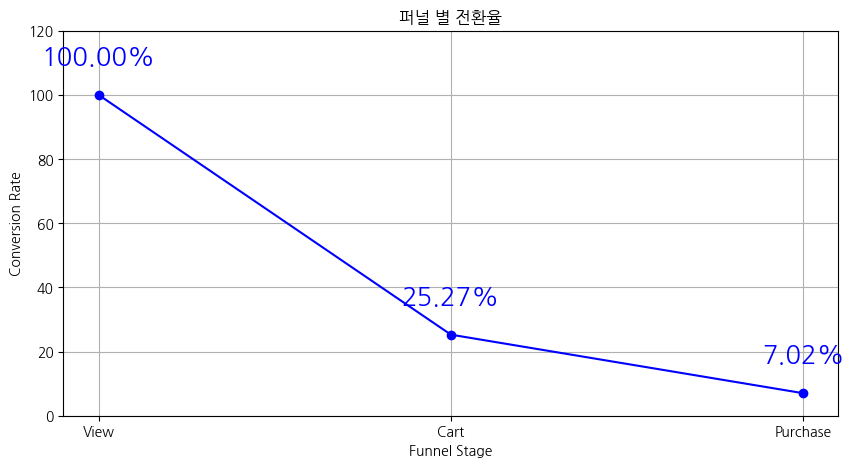

In [28]:
# 각 이벤트 타입별 유저 수 계산
view_users = df1[df1['event_type'] == 'view']['user_id'].nunique()
cart_users = df1[df1['event_type'] == 'cart']['user_id'].nunique()
purchase_users = df1[df1['event_type'] == 'purchase']['user_id'].nunique()

# 전환율 계산
view_conversion_rate = view_users / view_users *100
cart_conversion_rate = cart_users / view_users *100
purchase_conversion_rate = purchase_users / view_users *100

conversion_rates = [view_conversion_rate, cart_conversion_rate, purchase_conversion_rate]

# 퍼널 단계 이름
funnel_stages = ['View', 'Cart', 'Purchase']

# 꺾은선 그래프로 시각화
plt.figure(figsize=(10, 5))
plt.plot(funnel_stages, conversion_rates, marker='o', linestyle='-', color='b')
plt.title('퍼널 별 전환율')
plt.xlabel('Funnel Stage')
plt.ylabel('Conversion Rate')
plt.ylim(0, 120)  # 전환율(%)이므로 y축 범위를 0부터 100로 설정(100이 보이게 하기 위해 120로)

for i, txt in enumerate(conversion_rates):
    plt.text(funnel_stages[i], conversion_rates[i] + 8, f"{txt:.2f}%", ha='center', va='bottom', fontsize=18.5, color='blue')

plt.grid(True)
plt.show()

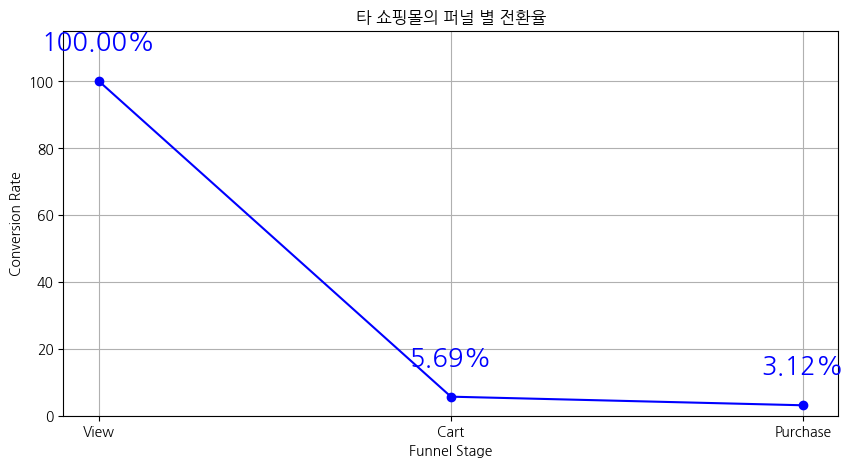

In [29]:
#타 쇼핑몰 전환율 계산
other_vcr = 66.08 / 66.08 *100
othrer_ccr = 3.76 / 66.08 *100
other_pcr = 2.06 / 66.08 *100

conversion_rates = [other_vcr, othrer_ccr, other_pcr]

# 퍼널 단계 이름
funnel_stages = ['View', 'Cart', 'Purchase']

# 꺾은선 그래프로 시각화
plt.figure(figsize=(10, 5))
plt.plot(funnel_stages, conversion_rates, marker='o', linestyle='-', color='b')
plt.title('타 쇼핑몰의 퍼널 별 전환율')
plt.xlabel('Funnel Stage')
plt.ylabel('Conversion Rate')
plt.ylim(0, 115)

for i, txt in enumerate(conversion_rates):
    plt.text(funnel_stages[i], conversion_rates[i] + 8, f"{txt:.2f}%", ha='center', va='bottom', fontsize=18.5, color='blue')

plt.grid(True)
plt.show()

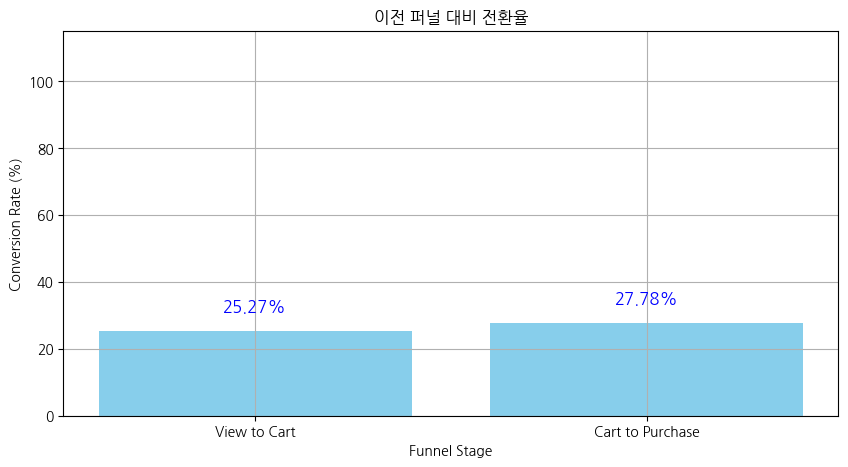

In [38]:
# 이전 퍼널 대비 전환율
view_to_cart_cvr = cart_users / view_users *100
cart_to_purchase_cvr = purchase_users / cart_users *100

conversion_rates = [view_to_cart_cvr, cart_to_purchase_cvr]

# 퍼널 단계 이름
funnel_stages = ['View to Cart', 'Cart to Purchase']

# 막대 그래프로 시각화
plt.figure(figsize=(10, 5))
bars = plt.bar(funnel_stages, conversion_rates, color='skyblue')
plt.title('이전 퍼널 대비 전환율')
plt.xlabel('Funnel Stage')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, 115)

# 각 막대에 전환율 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{yval:.2f}%", ha='center', va='bottom', fontsize=12, color='blue')

plt.grid(True)
plt.show()

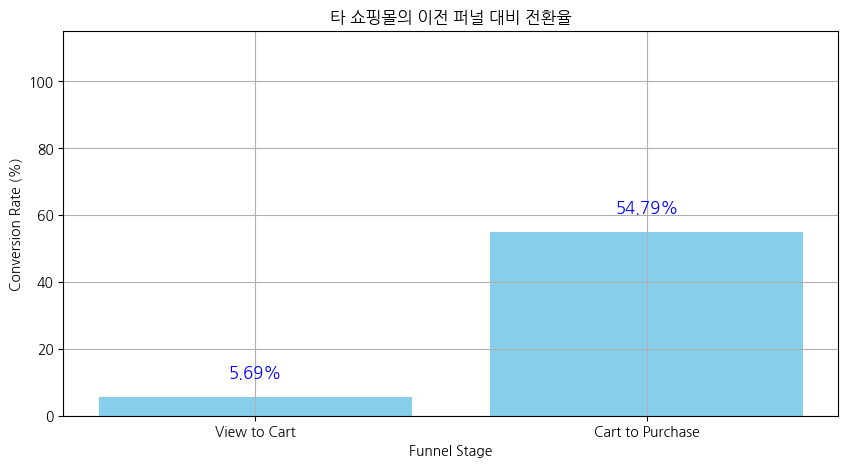

In [36]:
#타 쇼핑몰 전환율 계산
othrer_ccr = 3.76 / 66.08 *100
other_pcr = 2.06 / 3.76 *100

conversion_rates = [othrer_ccr, other_pcr]

# 퍼널 단계 이름
funnel_stages = ['View to Cart', 'Cart to Purchase']

# 막대 그래프로 시각화
plt.figure(figsize=(10, 5))
bars = plt.bar(funnel_stages, conversion_rates, color='skyblue')
plt.title('타 쇼핑몰의 이전 퍼널 대비 전환율')
plt.xlabel('Funnel Stage')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, 115)

# 각 막대에 전환율 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{yval:.2f}%", ha='center', va='bottom', fontsize=12, color='blue')

plt.grid(True)
plt.show()

### 지표 설정 : 장바구니 구매 전환율(cart to purchase)

## 현상 파악

## 평가

## 요인 분석

## 액션 제안